In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import json
import ast
import pandas as pd

gdf = gpd.read_file('./GAUL_2024_L1/GAUL_2024_L1.shp')
gdf2 = gpd.read_file('./GAUL_2024_L2/GAUL_2024_L2.shp')
df = pd.read_excel("EM_DAT_EUROPE_NaturalDis.xlsx")

In [2]:
df_grouped = df.groupby(['Start Year', 'Disaster Type']).size().unstack(fill_value=0)

In [ ]:
df_grouped

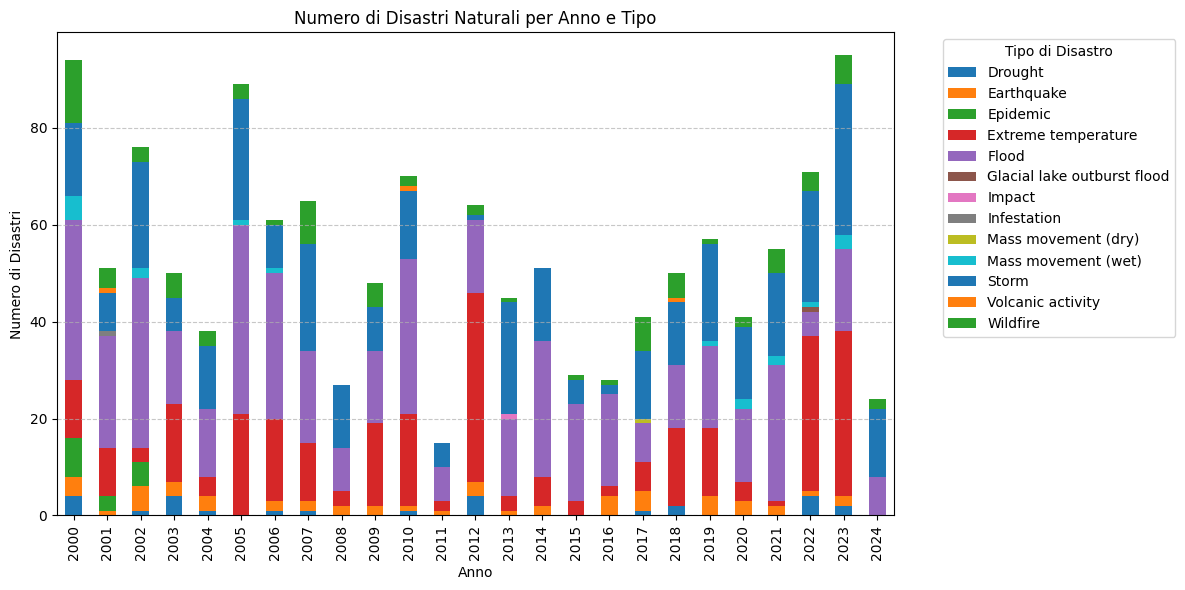

In [4]:
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.ylabel('Numero di Disastri')
plt.xlabel('Anno')
plt.title('Numero di Disastri Naturali per Anno e Tipo')
plt.legend(title='Tipo di Disastro', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
import plotly.express as px

# Agrupamos datos
df_grouped = df.groupby(['Start Year', 'Disaster Type']).size().reset_index(name='Cantidad')

# Gráfico interactivo de barras apiladas
fig = px.bar(
    df_grouped,
    x='Start Year',
    y='Cantidad',
    color='Disaster Type',
    title='Cantidad de Desastres Naturales por Año y Tipo',
    labels={'Cantidad': 'Cantidad de Desastres', 'Start Year': 'Año'},
)

fig.update_layout(
    barmode='stack',
    xaxis=dict(type='category'),
    legend_title_text='Tipo de Desastre',
    hovermode='x unified'
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [66]:
import altair as alt

df_grouped = df.groupby(['Start Year', 'Disaster Type']).size().reset_index(name='Cantidad')

chart = alt.Chart(df_grouped).mark_bar().encode(
    x='Start Year:O',
    y='Cantidad:Q',
    color='Disaster Type:N',
    tooltip=['Start Year', 'Disaster Type', 'Cantidad']
).properties(
    width=800,
    height=400,
    title='Cantidad de Desastres Naturales por Año y Tipo'
).interactive()

chart


alt.Chart(...)

In [ ]:
gdf2

In [ ]:
df

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [53]:
all_admin1_rows = []

for index, row in df.iterrows():
    if pd.notna(row['Admin Units']):
        try:
            admin_units = json.loads(row['Admin Units'])
        except:
            try:
                admin_units = ast.literal_eval(row['Admin Units'])
            except:
                continue

        if isinstance(admin_units, list):
            for unit in admin_units:
                if 'adm1_name' in unit:
                    new_row = row.copy()
                    new_row['adm1_name'] = unit['adm1_name']
                    all_admin1_rows.append(new_row)

admin1_df = pd.DataFrame(all_admin1_rows)
admin1_df.head()


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,adm1_name
0,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25,Bihor
0,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25,Cluj
0,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25,Mures
0,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25,Salaj
0,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25,Satu Mare


In [54]:
def extract_from_admin_units(df:pd.DataFrame, key_to_search:str) -> pd.DataFrame:
    all_rows = []
    for index, row in df.iterrows():
        if pd.notna(row['Admin Units']):
            try:
                admin_units = json.loads(row['Admin Units'])
            except:
                try:
                    admin_units = ast.literal_eval(row['Admin Units'])
                except:
                    continue
            if isinstance(admin_units, list):
                for unit in admin_units:
                    if key_to_search in unit:
                        new_row = row.copy()
                        new_row[key_to_search] = unit[key_to_search]
                        all_rows.append(new_row)
    return pd.DataFrame(all_rows)

df_adm1 = extract_from_admin_units(df, 'adm1_name')
df_adm2 = extract_from_admin_units(df, 'adm2_name')


In [57]:
df_adm1 = df_adm1.merge(
    gdf[['iso3_code', 'gaul1_name', 'geometry']],
    left_on=['ISO', 'adm1_name'],
    right_on=['iso3_code', 'gaul1_name'],
    how='left'
)


In [56]:
df_adm1

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,adm1_name,iso3_code,gaul2_name,geometry
0,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,56.514291,"[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25,Bihor,NaN,NaN,None
1,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,56.514291,"[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25,Cluj,NaN,NaN,None
2,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,56.514291,"[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25,Mures,NaN,NaN,None
3,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,56.514291,"[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25,Salaj,NaN,NaN,None
4,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,56.514291,"[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25,Satu Mare,ROU,Satu Mare,"POLYGON ((25.42893 46.38402, 25.43161 46.38332..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4972,2023-0289-RUS,No,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,RUS,...,50000.0,50000.0,100.000000,"[{""adm1_code"":2526,""adm1_name"":""Kurganskaya Ob...",2023-05-19,2023-09-26,Tyumenskaya Oblast,NaN,NaN,None
4973,2023-0487-RUS,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,RUS,...,NaN,NaN,100.000000,"[{""adm1_code"":2532,""adm1_name"":""Mariy-el Rep.""}]",2023-07-31,2023-09-26,Mariy-el Rep.,NaN,NaN,None
4974,2023-9234-ESP,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,ESP,...,2400000.0,2400000.0,100.000000,"[{""adm1_code"":2716,""adm1_name"":""Andalucía""},{""...",2023-04-19,2024-02-09,Andalucía,NaN,NaN,None
4975,2023-9234-ESP,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,ESP,...,2400000.0,2400000.0,100.000000,"[{""adm1_code"":2716,""adm1_name"":""Andalucía""},{""...",2023-04-19,2024-02-09,Principado de Asturias,NaN,NaN,None


In [49]:
gdf['gaul1_name_upper'] = gdf['gaul1_name'].str.upper()
df_adm1['adm1_name_upper'] = df_adm1['adm1_name'].str.upper()

In [50]:
df_adm1 = df_adm1.merge(
    gdf[['iso3_code', 'gaul1_name_upper', 'geometry']],
    left_on=['ISO', 'adm1_name_upper'],
    right_on=['iso3_code', 'gaul1_name_upper'],
    how='left'
)

In [ ]:
df_adm1

In [ ]:
gdf